# Разработать алгоритм Оцу

Метод Оцу — это алгоритм вычисления порога бинаризации для полутонового изображения,

Алгоритм позволяет разделить пиксели двух классов («полезные» и «фоновые»), рассчитывая такой порог, чтобы внутриклассовая дисперсия была минимальной

$$ \omega_0 (T)= \sum_{i=0}^{T-1} P(i) \\
\omega_1(T) = \sum_{i=T}^{L-1} P(i) = 1 - \omega_0{T} \\
P(i) = \frac{\text{h}(i)}{N} $$
<br>
где- 𝜔0— вероятность класса фоновых пикселей,𝜔1— вероятность класса объектов,T-порог L-количество уровней яркости (обычно 256),ℎ(𝑖) - гистограмму яркости изображения,𝑁
— общее число пикселей в изображении.
.


Общая средняя яркость: $$\mu = \sum_{i=0}^{L-1} i \cdot P(i)$$

Средние яркости классов:$$\mu_0 = \frac{\sum_{i=0}^{T-1} i \cdot P(i)}{\omega_0} \\
\mu_1 = \frac{\sum_{i=T}^{L-1} i \cdot P(i)}{\omega_1}$$

Межклассовая дисперсия:$$\sigma_b^2 = \omega_0 (\mu_0 - \mu)^2 + \omega_1 (\mu_1 - \mu)^2 \\
= \omega_0 \omega_1 (\mu_0 - \mu_1)^2$$

#### Шаги алгоритма

1. **Вычисление гистограммы яркости**: подсчитать количество пикселей каждого уровня серого в изображении, вычислить вероятность каждого уровня серого $P(i)$.

2. **Инициализация параметров**:

   - Вычислить глобальную среднюю яркость $\mu$.
   - Установить начальное максимальное межклассовое рассеяние
    $ \sigma_b^2 {max}= 0 $.
   - Установить оптимальный порог $T_{opt} = 0$.

3. **Перебор всех возможных значений порога $T$ (от 0 до $L-1$)**:

   - Вычислить веса переднего плана и фона $\omega_0$ и $\omega_1$.

   - Вычислить средние значения яркости переднего плана и фона $\mu_0$ и $\mu_1$.

   - Вычислить межклассовое рассеяние $\sigma_b^2$.

   - Если текущая $ \sigma_b^2 > \sigma_b^2(max) $, то обновить:
   $$ \sigma_b^2 > \sigma_b^2(max) \\
    T_{opt} = t $$
4.**Определение оптимального порога: после завершения перебора, T_{opt} является оптимальным порогом.**

5.**Бинаризация изображения: на основе оптимального порога T_{opt} преобразуем исходное изображение в бинарное изображение.**

In [2]:
#image:трехмерный список, представляющий цветное изображение.
# Каждый элемент 'image[i][j]' — это список '[R, G, B]'.
def RGB2GRAY(image): #преобразование цветного изображения в оттенки серого
    # Получение размеров изображения
    height = len(image)
    width = len(image[0])
    grayscale = []
    for i in range(height):
        grayscale_row = []
        for j in range(width):
            # Извлечение значений RGB
            R,G,B = image[i][j]
            # Использование формулы яркости для вычисления значений серого
            gray = int(0.299*R + 0.589*G + 0.114*B)
            grayscale_row.append(gray)
        grayscale.append(grayscale_row)
    return grayscale

In [3]:
#вычисление гистограммы значений серого
def Gray_hist(image):
    gray_image = RGB2GRAY(image)
    histogram = [0] * 256 # Инициализация гистограммы из 256 нулей
    height = len(gray_image)
    width = len(gray_image[0])
    for i in range(height):
        for j in range(width):
            gray_value = gray_image[i][j]
            histogram[gray_value] += 1 # Увеличение счетчика соответствующего значения серого
    return histogram

In [4]:
#реализация метода Оцу для поиска оптимального порога
def otsu_binarization(image):
    height = len(image)
    width = len(image[0])
    histogram = Gray_hist(image)
    total_pixels = height*width
    sum_total = 0 # Общая сумма значений серого всех пикселей
    for t in range(256):
        sum_total+=t*histogram[t] 

    sumB = 0 # Кумулятивная сумма значений серого для фона
    wB = 0  # Вес фона (количество пикселей)
    maximum_between_class_variance = 0
    optimal_threshold = 0

    for t in range(256):
        wB += histogram[t] 
        if wB == 0:
            continue # Если нет пикселей, принадлежащих этому классу, пропустить
        wF = total_pixels - wB #Вес класса переднего плана
        if wF == 0:
            break # Если все пиксели принадлежат фону, остановить цикл
        sumB += t*histogram[t] # Кумулятивная сумма значений серого для фона
        mB = sumB /wB          # Среднее значение серого для класса фона
        mF = (sum_total-sumB)/ wF  # Среднее значение серого для класса переднего плана
       
        # Вычисление межклассовой дисперсии
        between_class_variance = wB * wF * (mB-mF)**2
        # Обновление максимальной межклассовой дисперсии и оптимального порога
        if between_class_variance > maximum_between_class_variance:
            maximum_between_class_variance = between_class_variance
            optimal_threshold = t

    return optimal_threshold

In [5]:
#создание бинаризованного изображения с использованием оптимального порога
def binaryImage(image):
    optimal_threshold = otsu_binarization(image)
    binary_image = []
    gray_img = RGB2GRAY(image)
    print(optimal_threshold)
    for i in range(len(image)):
        binary_image_row=[]
        for j in range(len(image[0])):
            if gray_img[i][j] > optimal_threshold:
                binary_image_row.append(255)
            else:
                binary_image_row.append(0)
        binary_image.append(binary_image_row)
   # Возвращается двумерный список, представляющий бинаризованное изображение, 
   # где 255 обозначает передний план, а 0 — фон.
    return binary_image


Здесь использовад библиотеки cv2 и matplotlib для тестирования результатов обработки алгоритма на реальных изображениях

In [7]:
import cv2
def read_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Error")
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_list = img_rgb.tolist()
    return img_list

In [8]:
path = "./test.png"
img = read_image(path)
hist = Gray_hist(img)
converted_img = binaryImage(img)

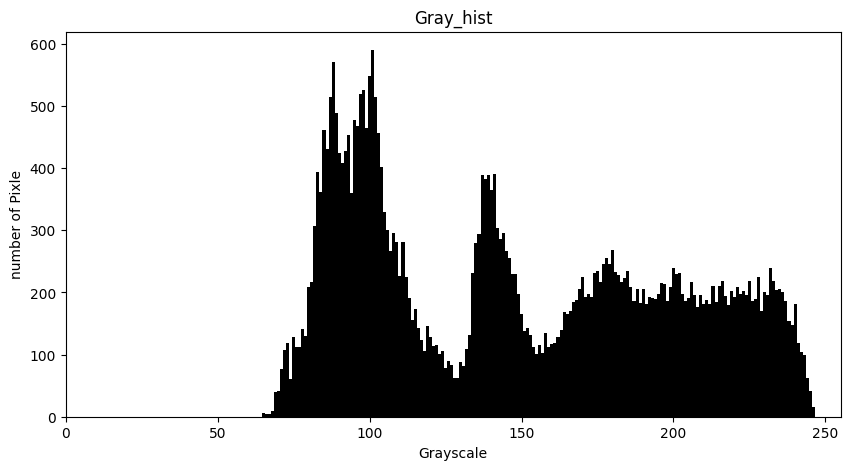

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  
plt.title('Gray_hist')  
plt.xlabel('Grayscale')  
plt.ylabel('number of Pixle')  
plt.bar(range(256), hist, color='black', width=1)  
plt.xlim([0, 255])  
plt.show()  

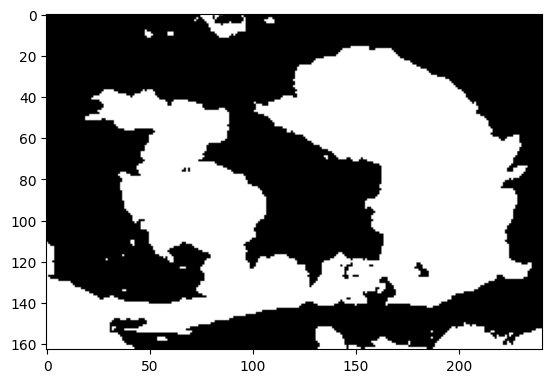

In [13]:
import numpy as np
bin_array = np.array(converted_img,dtype=np.uint8)
plt.imshow(bin_array,cmap='gray')  
plt.show()  

Test1:Тестирование алгоритма на изображении с четким контрастом между передним планом и фоном.

0


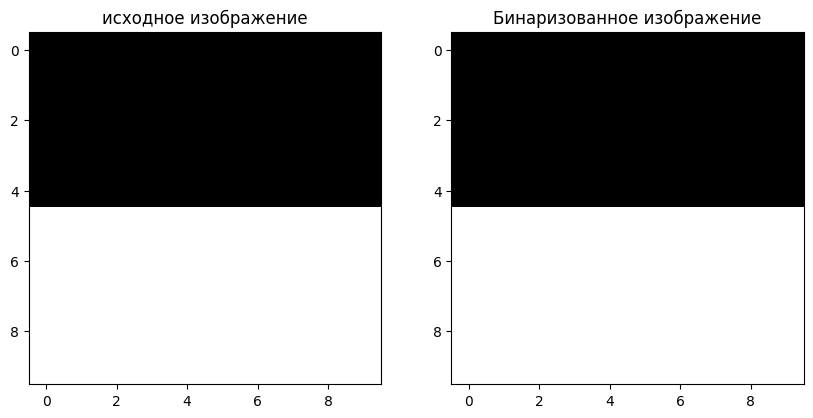

In [117]:
def test_high_contrast_image():
        # Создаем изображение с высоким контрастом
        height, width = 10, 10
        image = []
        for i in range(height):
            row = []
            for j in range(width):
                if i < height // 2:
                    pixel = [0, 0, 0]  # Черный пиксель
                else:
                    pixel = [255, 255, 255]  #  Белый пиксель
                row.append(pixel)
            image.append(row)

        # Применим метод Оцу
        binary_image = binaryImage(image)
       

        fig,axes = plt.subplots(1,2,figsize=(10,5))
        axes[0].imshow(image)  
        axes[0].set_title('исходное изображение')
        axes[1].imshow(binary_image,cmap='gray')
        axes[1].set_title('Бинаризованное изображение')
        plt.show()
test_high_contrast_image()


Test2:Тестирование алгоритма на изображениях с низкой контрастностью.

120


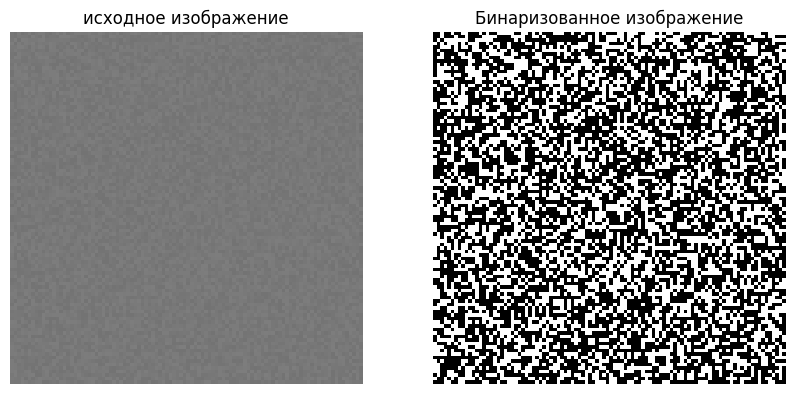

In [91]:
def test_low_contrast_image():
    height,width = 100,100
    image = []
    # Для создания изображения с пиксельными значениями в узком диапазоне серого
    for i in range(height):
        row = []
        for j in range(width):
            value = 120 + random.randint(-5,5) # Значения серого от 115 до 125
            pixel = [value,value,value]
            row.append(pixel)
        image.append(row)
    binary_image = binaryImage(image)

    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    axes[1].axis('off')
test_low_contrast_image()

Test3: Тестирование стабильности алгоритма на изображениях с случайным шумом и эффективности его вывода.

126


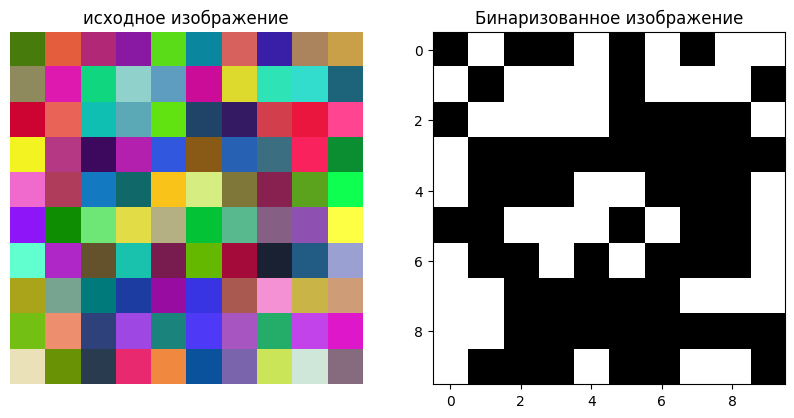

In [116]:
import random
def test_noisy_image():
    random.seed(22)

    height,width = 10,10
    image=[]
    for _ in range(height):
        row = []
        for _ in range(width):
            # Сгенерируем случайные значения RGB
            pixel = [random.randint(0,255) for _ in range(3)]
            row.append(pixel)
        image.append(row)
    
    binary_image = binaryImage(image)

    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    plt.show()
test_noisy_image()

Test4: Тестирование алгоритма на пустом изображении, где все пиксели имеют одинаковый цвет.

0


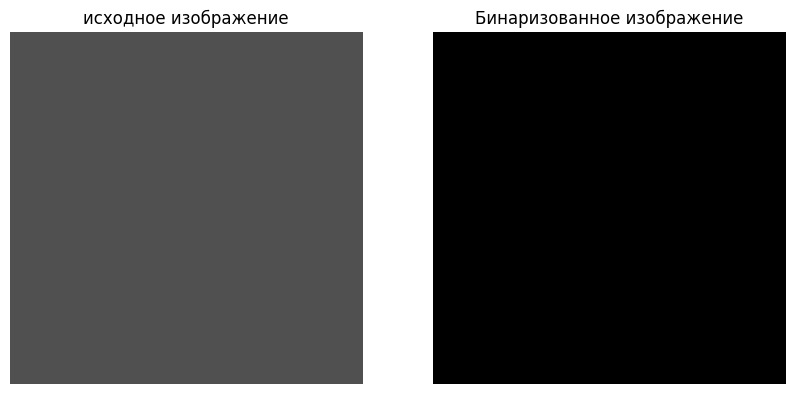

In [64]:
def test_blank_image():
    height, width = 10,10
    image = [[[80,80,80] for _ in range(width)] for _ in range(height)]

    binary_image = binaryImage(image)

    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    axes[1].axis('off')
    plt.show()
test_blank_image()

Test5:Тестирование работы алгоритма на изображениях с градиентом от чёрного к белому.

126


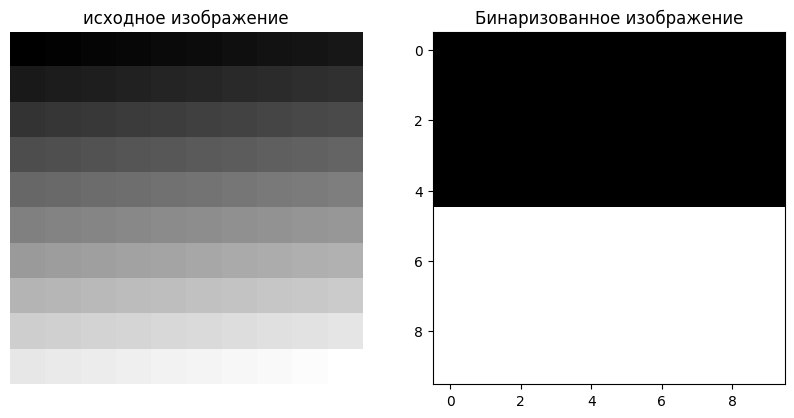

In [115]:
def test_gradient_image():
    height,width = 10, 10
    image = []
    for i in range(height):
        row = []
        for j in range(width):
            # Генерация градиентных значений от 0 до 255
            value = int((i * width + j) / (height*width-1) *255)
            pixel = [value,value,value]
            row.append(pixel)
        image.append(row)

    binary_image = binaryImage(image)


    
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    plt.show()
test_gradient_image()
    

test6:Тестирование работы алгоритма на изображениях с несколькими областями разной степени серого.

50


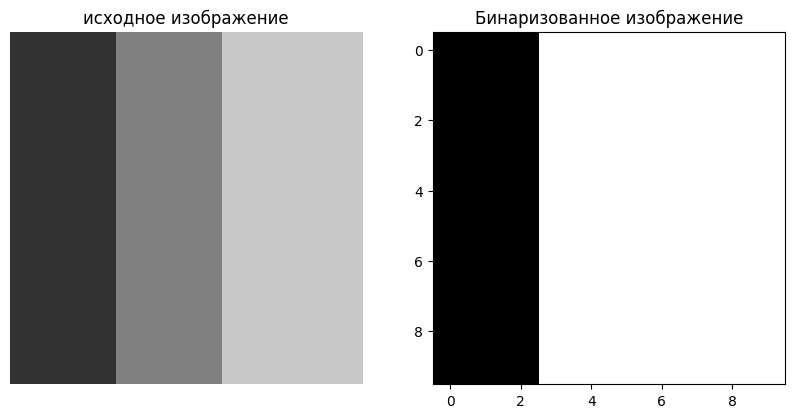

In [114]:
def test_multiple_thresholds_image():
    height,width = 10,10
    image=[]
    for i in range(height):
        row=[]
        for j in range(width):
            if j < width // 3:
                    pixel = [50, 50, 50]    #Тёмно-серый
            elif j < 2 * width // 3:
                    pixel = [128, 128, 128]  #Средне-серый
            else:
                    pixel = [200, 200, 200]  # Светло-серый
            row.append(pixel)
        image.append(row)
    
    binary_image = binaryImage(image)

    
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].imshow(image)  
    axes[0].set_title('исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(binary_image,cmap='gray')
    axes[1].set_title('Бинаризованное изображение')
    plt.show()
test_multiple_thresholds_image()

test7:Тестирование работы алгоритма на изображениях с шумом «соль и перец»(одна из форм шума, которая как правило встречается на графических и видео изображениях. Этот шум представляет собой случайно возникающие чёрные и белые пиксели.).

0


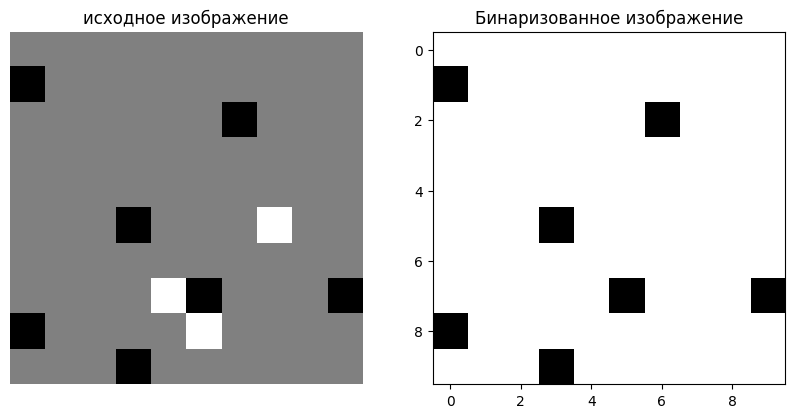

In [113]:
def test_salt_and_paper_noise():
    random.seed(12)
    height,width = 10,10
    #Базовое серое изображение
    image = [[[128,128,128] for _ in range(width)] for _ in range(height)]
    
    # Добавление шума «соль и перец»
    # 10% шумовых пикселей
    num_noisy_pixels = int(0.1*height*width)
    for _ in range(num_noisy_pixels):
        i = random.randint(0,height - 1)
        j = random.randint(0,width-1)
        if random.choice([True,False]):
            image[i][j] = [0,0,0] # Чёрный шум (перец)
        else:
            image[i][j] = [255,255,255] # Белый шум (соль)
        
    binary_image = binaryImage(image)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("исходное изображение")
    ax[0].axis('off')
    ax[1].imshow(binary_image,cmap='gray')
    ax[1].set_title('Бинаризованное изображение')
    plt.show()
test_salt_and_paper_noise()

Test8:Тестирование работы алгоритма на изображениях с шахматной доской.

0


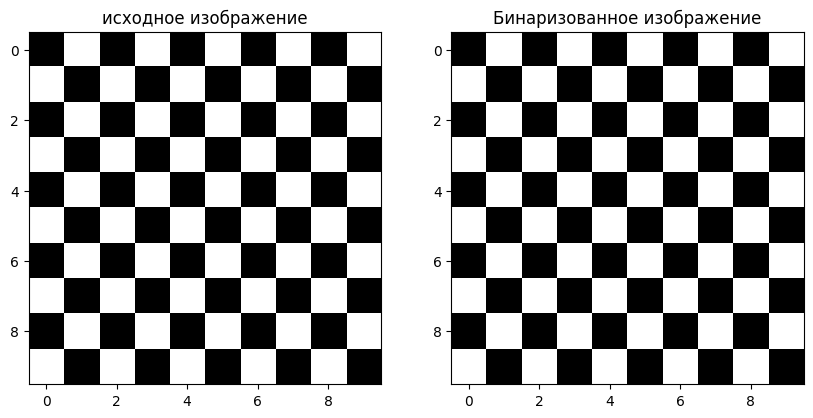

In [88]:
def test_checkerboard_pattern():
    height,width = 10,10
    image=[]

    for i in range(height):
        row = []
        for j in range(width):
            if(((i % 2 == 0) & (j % 2 == 0)) | (i % 2 != 0) & (j % 2 != 0)):
                pixel = [0,0,0]
            else:
                pixel = [255,255,255]
            row.append(pixel)
        image.append(row)
    binary_image = binaryImage(image)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("исходное изображение")
    ax[1].imshow(binary_image,cmap='gray')
    ax[1].set_title('Бинаризованное изображение')
    plt.show()
test_checkerboard_pattern()

Test9: Тестирование работы алгоритма на изображениях, имитирующих текст.

0


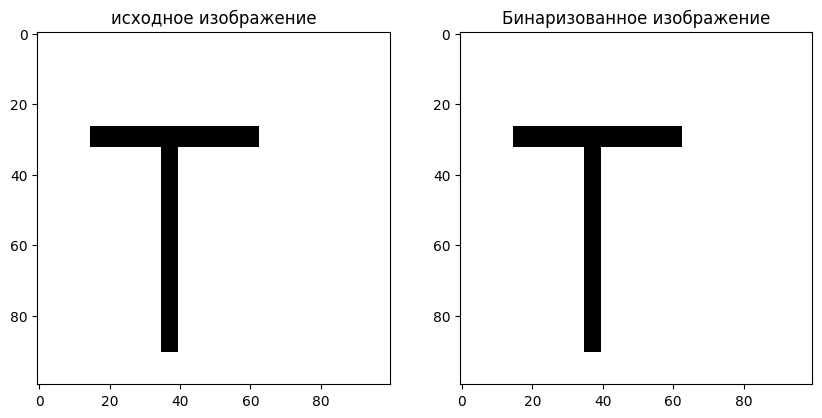

In [97]:
def test_image_with_text():
    height,width = 100,100
    image = []
    for i in range(height):
        row=[]
        for j in range(width):
            if (27<= i <= 32 and 15 <=j <=62) | (35 <=j <= 39 and 33<= i <= 90):
                pixel = [0,0,0]
            else:
                pixel = [255,255,255]
            row.append(pixel)
        image.append(row)
    
    binary_image = binaryImage(image)
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("исходное изображение")
    ax[1].imshow(binary_image,cmap='gray')
    ax[1].set_title('Бинаризованное изображение')
    plt.show()
test_image_with_text()

Test10:Тестирование производительности и корректности алгоритма на больших изображениях.

0


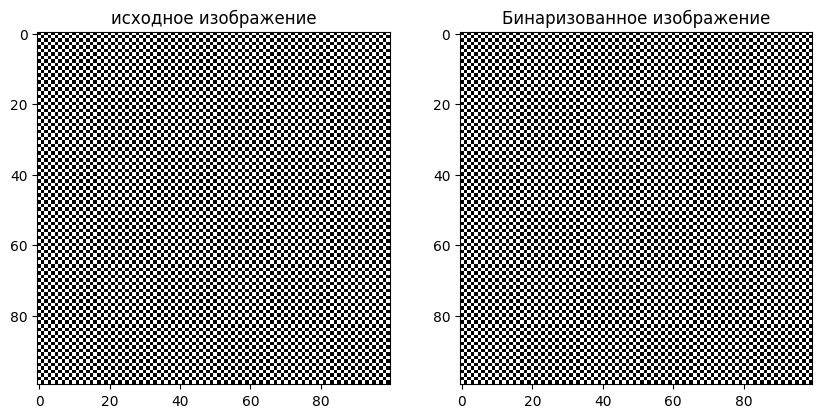

In [112]:
def test_large_image():
    height,width = 100,100
    image = []

    for i in range(height):
        row=[]
        for j in range(width):
            if(i+j) %2 == 0:
                pixel = [0,0,0]
            else:
                pixel = [255,255,255]
            row.append(pixel)
        image.append(row)
    binary_image = binaryImage(image)

    fig,ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].imshow(image)
    ax[0].set_title("исходное изображение")
    ax[1].imshow(binary_image,cmap='gray')
    ax[1].set_title('Бинаризованное изображение')
    plt.show()
test_large_image()